In [1]:
# Import libraries 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
TESS=r"C:\Users\yaswa\maha\multimodal emotion recognition in human robots interaction\toronto emotional speech set\dataverse_files"
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list

['OAF_back_angry.wav',
 'OAF_back_disgust.wav',
 'OAF_back_fear.wav',
 'OAF_back_happy.wav',
 'OAF_back_neutral.wav',
 'OAF_back_ps.wav',
 'OAF_back_sad.wav',
 'OAF_bar_angry.wav',
 'OAF_bar_disgust.wav',
 'OAF_bar_fear.wav',
 'OAF_bar_happy.wav',
 'OAF_bar_neutral.wav',
 'OAF_bar_ps.wav',
 'OAF_bar_sad.wav',
 'OAF_base_angry.wav',
 'OAF_base_disgust.wav',
 'OAF_base_fear.wav',
 'OAF_base_happy.wav',
 'OAF_base_neutral.wav',
 'OAF_base_ps.wav',
 'OAF_base_sad.wav',
 'OAF_bath_angry.wav',
 'OAF_bath_disgust.wav',
 'OAF_bath_fear.wav',
 'OAF_bath_happy.wav',
 'OAF_bath_neutral.wav',
 'OAF_bath_ps.wav',
 'OAF_bath_sad.wav',
 'OAF_bean_angry.wav',
 'OAF_bean_disgust.wav',
 'OAF_bean_fear.wav',
 'OAF_bean_happy.wav',
 'OAF_bean_neutral.wav',
 'OAF_bean_ps.wav',
 'OAF_bean_sad.wav',
 'OAF_beg_angry.wav',
 'OAF_beg_disgust.wav',
 'OAF_beg_fear.wav',
 'OAF_beg_happy.wav',
 'OAF_beg_neutral.wav',
 'OAF_beg_ps.wav',
 'OAF_beg_sad.wav',
 'OAF_bite_angry.wav',
 'OAF_bite_disgust.wav',
 'OAF_bite_f

In [3]:
path = []
emotion = []

for i in dir_list:
    fname = os.path.join(TESS, i)
    
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()


labels
Unknown    397080
Name: count, dtype: int64

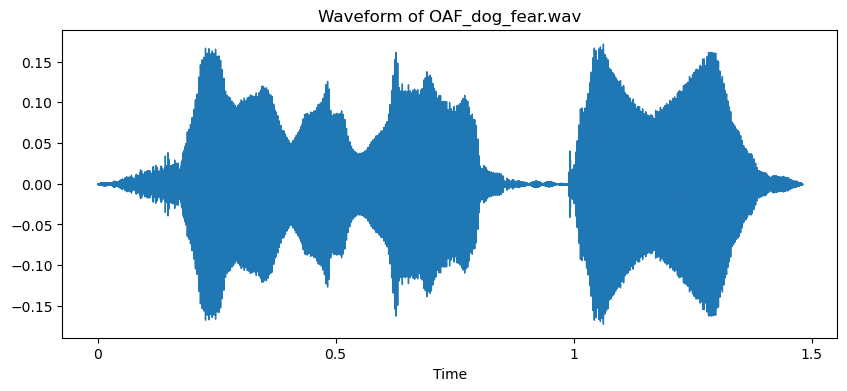

In [4]:
# lets play a fearful track 
fname = os.path.join(TESS, 'OAF_dog_fear.wav')

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(10, 4))
librosa.display.waveshow(data, sr=sampling_rate)
plt.title('Waveform of OAF_dog_fear.wav')
plt.show()

# Lets play the audio 
ipd.Audio(fname)


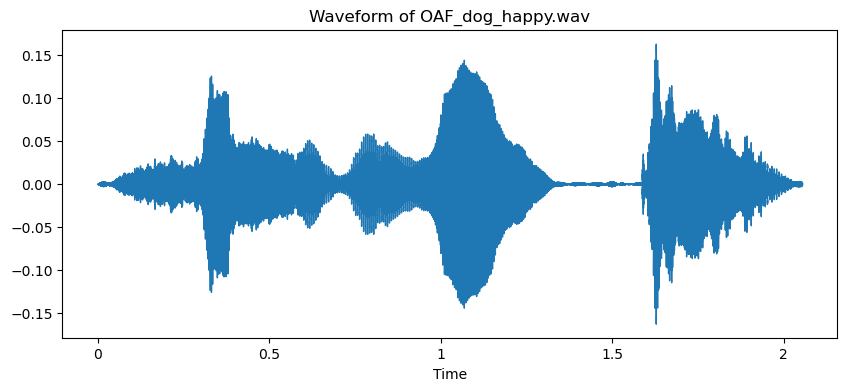

In [5]:
# lets play a happy track 

fname = os.path.join(TESS, 'OAF_dog_happy.wav')

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(10, 4))
librosa.display.waveshow(data, sr=sampling_rate)
plt.title('Waveform of OAF_dog_happy.wav')
plt.show()

# Lets play the audio 
ipd.Audio(fname)


In [6]:
ls

 Volume in drive C is OS
 Volume Serial Number is 4435-2865

 Directory of C:\Users\yaswa\maha\multimodal emotion recognition in human robots interaction

15-10-2024  17:14    <DIR>          .
15-10-2024  15:55    <DIR>          ..
15-10-2024  16:15    <DIR>          .ipynb_checkpoints
10-10-2024  11:20        56,810,678 audio_emotion.pkl
08-10-2024  11:02           126,883 MANIFEST.TXT
15-10-2024  17:14           309,602 multimodal_baseline.ipynb
15-10-2024  16:18           747,699 TESS-1-EDA.ipynb
10-10-2024  11:20       113,517,878 text_emotion.pkl
08-10-2024  11:34    <DIR>          toronto emotional speech set
               5 File(s)    171,512,740 bytes
               4 Dir(s)  40,928,604,160 bytes free


Here In this we are doing EDA on Old Talker who is speaking in angry manner and she is saying 200 words ' say the word - $word ' is what they say in all audio files

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

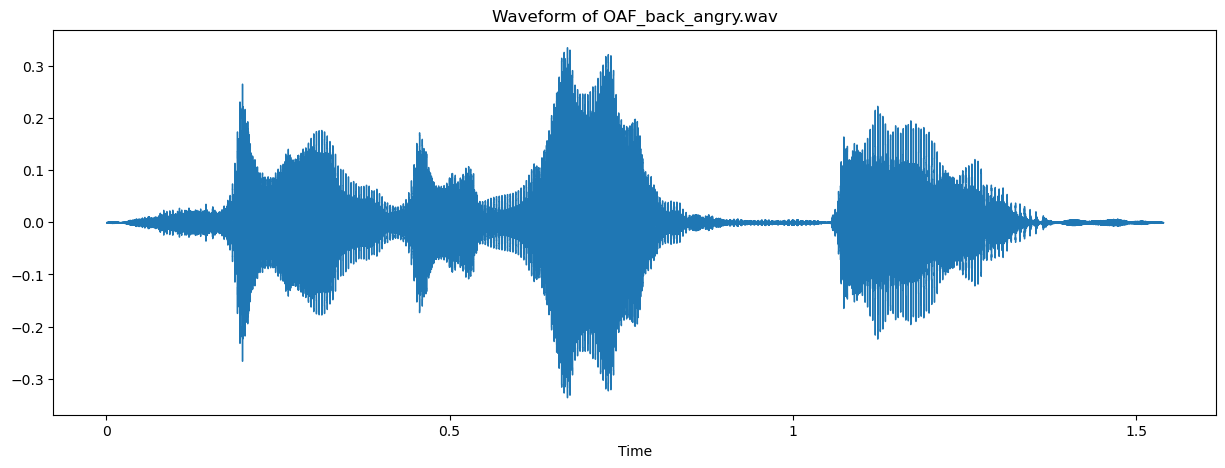

In [8]:

# Define the correct file path
TESS = r'C:\Users\yaswa\maha\multimodal emotion recognition in human robots interaction\toronto emotional speech set\dataverse_files'
fname = os.path.join(TESS, 'OAF_back_angry.wav')

# Load the audio file
data, sampling_rate = librosa.load(fname)

# Plot the waveform using waveshow
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)
plt.title('Waveform of OAF_back_angry.wav')
plt.show()

# Play the audio
ipd.Audio(fname)


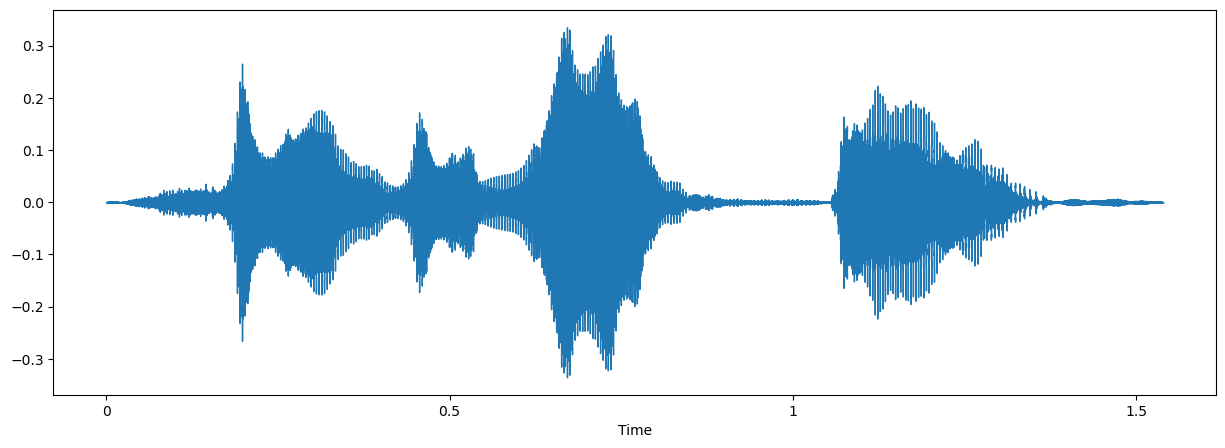

In [9]:
emtess = r'C:\Users\yaswa\maha\multimodal emotion recognition in human robots interaction\toronto emotional speech set\dataverse_files'
FNAME = os.path.join(TESS, 'OAF_back_angry.wav')

data, sampling_rate = librosa.load(FNAME)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
#ipd.Audio('../input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav')

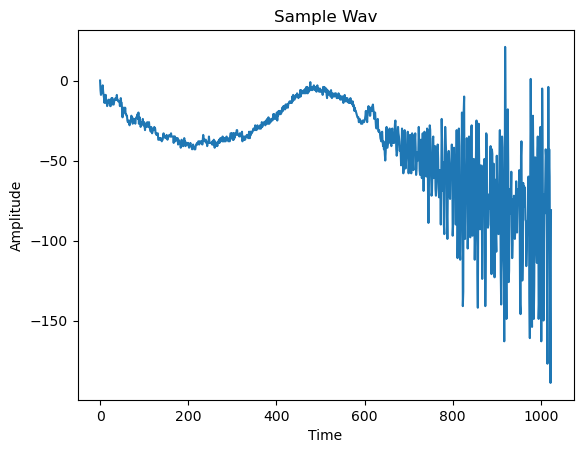

In [10]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

# read audio samples
input_data = read(FNAME)
audio = input_data[1]
# plot the first 1024 samples
plt.plot(audio[0:1024])
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sample Wav")
# display the plot
plt.show()

Results: https://docs.google.com/spreadsheets/d/149iS0mC3PbC0Lv1OYSs_-CbGEy6ufvfkYAVDvI0Rsvk/edit#gid=0

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import fnmatch
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
from sklearn.manifold import TSNE
import json
# Importing library 
import csv 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [12]:
cd C:\Users\yaswa\maha\multimodal emotion recognition in human robots interaction\toronto emotional speech set\dataverse_files\


C:\Users\yaswa\maha\multimodal emotion recognition in human robots interaction\toronto emotional speech set\dataverse_files


In [13]:
files = []
for root, dirnames, filenames in os.walk('.'):
    for filename in fnmatch.filter(filenames, '*.wav'):
        files.append(os.path.join(root, filename))

print("found %d .wav files"%(len(files)))

found 2800 .wav files


In [14]:
def get_features(y, sr):
    y = y[0:sr]  # analyze just first second
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    log_S = librosa.amplitude_to_db(S, ref=np.max)
    mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)
    delta_mfcc = librosa.feature.delta(mfcc, mode='nearest')
    delta2_mfcc = librosa.feature.delta(mfcc, order=2, mode='nearest')
    feature_vector = np.concatenate((np.mean(mfcc,1), np.mean(delta_mfcc,1), np.mean(delta2_mfcc,1)))
    feature_vector = (feature_vector-np.mean(feature_vector)) / np.std(feature_vector)
    return feature_vector

In [15]:
feature_vectors = []
sound_paths = []
for i,f in enumerate(files):
    if i % 100 == 0:
        print("get %d of %d = %s"%(i+1, len(files), f))
    y, sr = librosa.load(f)
    feat = get_features(y, sr)
    feature_vectors.append(feat)
    sound_paths.append(f)
        
print("calculated %d feature vectors"%len(feature_vectors))

get 1 of 2800 = .\OAF_back_angry.wav
get 101 of 2800 = .\OAF_came_fear.wav
get 201 of 2800 = .\OAF_death_neutral.wav
get 301 of 2800 = .\OAF_five_sad.wav
get 401 of 2800 = .\OAF_hate_disgust.wav
get 501 of 2800 = .\OAF_juice_happy.wav
get 601 of 2800 = .\OAF_lid_ps.wav
get 701 of 2800 = .\OAF_met_angry.wav
get 801 of 2800 = .\OAF_numb_fear.wav
get 901 of 2800 = .\OAF_rag_neutral.wav
get 1001 of 2800 = .\OAF_rough_sad.wav
get 1101 of 2800 = .\OAF_soap_disgust.wav
get 1201 of 2800 = .\OAF_thought_happy.wav
get 1301 of 2800 = .\OAF_walk_ps.wav
get 1401 of 2800 = .\YAF_back_angry.wav
get 1501 of 2800 = .\YAF_came_fear.wav
get 1601 of 2800 = .\YAF_death_neutral.wav
get 1701 of 2800 = .\YAF_five_sad.wav
get 1801 of 2800 = .\YAF_hate_disgust.wav
get 1901 of 2800 = .\YAF_juice_happy.wav
get 2001 of 2800 = .\YAF_lid_ps.wav
get 2101 of 2800 = .\YAF_met_angry.wav
get 2201 of 2800 = .\YAF_numb_fear.wav
get 2301 of 2800 = .\YAF_rag_neutral.wav
get 2401 of 2800 = .\YAF_rough_sad.wav
get 2501 of 2800

In [16]:
feature_vectors[1].shape

(39,)

In [17]:
# Convert the list of feature vectors to a NumPy array
feature_vectors_np = np.array(feature_vectors)

# Now apply TSNE
model = TSNE(n_components=2, learning_rate=150, perplexity=30, verbose=2, angle=0.1).fit_transform(feature_vectors_np)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2800 samples in 0.002s...
[t-SNE] Computed neighbors for 2800 samples in 0.822s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2800
[t-SNE] Computed conditional probabilities for sample 2000 / 2800
[t-SNE] Computed conditional probabilities for sample 2800 / 2800
[t-SNE] Mean sigma: 0.029845
[t-SNE] Computed conditional probabilities in 0.299s
[t-SNE] Iteration 50: error = 68.5229416, gradient norm = 0.0299594 (50 iterations in 5.440s)
[t-SNE] Iteration 100: error = 63.2242241, gradient norm = 0.0123619 (50 iterations in 3.103s)
[t-SNE] Iteration 150: error = 61.9211159, gradient norm = 0.0059849 (50 iterations in 2.900s)
[t-SNE] Iteration 200: error = 61.3162460, gradient norm = 0.0035612 (50 iterations in 2.913s)
[t-SNE] Iteration 250: error = 60.9623795, gradient norm = 0.0056419 (50 iterations in 2.928s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.962379
[t-SNE] Iteration 300: erro

In [18]:
symbol=[]
symbol=[1]*1400
x=[2]*1400
symbol.extend(x)

In [19]:
file=[1,2,3,4,5,6,7]
color=[]
for i in file:
    x=[i]*200
    color.extend(x)
color.extend(color)

In [20]:
len(color)

2800

In [21]:
x_axis=model[:,0]
y_axis=model[:,1]
import plotly.express as px
fig = px.scatter(x=x_axis, y=y_axis,color=color,symbol=symbol,opacity=0.7)
fig.show()